# Comparar archivos y datashets con python (Pandas, MD5 y SHA1)

Cuando tenemos un conjunto de datos pequeño, una de las maneras más simples de comparar dos datashets es con excel o similar, y comparar las dos hojas con esta sencilla instrucción en cada casilla (en la casilla A1, que tomaremos como referencia):

=Sheet1!A1=Sheet2!A1

Esta instrucción realizará una comparación booleana entra las casillas A1 de las hojas llamadas "Sheet1" y "Sheet2" y devolverá True en caso de que sean iguales y False en contrario. 
Sin embargo, con volumenes de datos muy grandes, trabajar con excel resulta costoso o impracticable. En situaciones como esta se utilizan herramientas alternativas, como R o python. En este notebook se presentan diversas maneras de comparar archivos y datashets en python, con una explicación guiada de cada método así como una implementación ejecutable en python de cada uno.



# Índice:
* [Librerías](#librerias)
* [Carga y lectura de datos](#lectura)


* [Comparando datos utilizando la libreria pandas](#comparando)
    * [Método Eq()](#eq)
    * [Método equals](#equals)
    * [Método any](#any)
    
* [Comparando datos utilizando el algoritmo MD5 CHecksum](#md5)

* [Comparando datos utilizando el algoritmo SHA1](#sha1)
  
Ejecutables python:
* [Comparando datos utilizando la librería pandas](#python_pandas)
* [Comparando datos utilizando el algoritmo MD5 CHecksum](#python_md5)
* [Comparando datos utilizando el algoritmo SHA1](#python_sha1)
        

## Librerias <a class="anchor" id="librerias"></a>

Usaremos la librería *pandas* para leer y manejar las hojas de cálculo, y las librerias *xlrd* y *openpyxl*, que ayudaran también  con la lectura y escritura de archivos. Para instalar estas librerias, quitar el comentario (el '#' de la siguiente línea) y ejecutarla.

##### importante: Si las librerías no estaban instaladas, será necesario reiniciar el kernel si se esta trabajando con un cuaderno jupyter (Ir a "kernel" y "restart").

In [1]:
#pip install pandas
# Cargar las librerias
import pandas as pd


# Carga y lectura de datos <a class="anchor" id="lectura"></a>
Utilizaremos un fichero que simula una base de datos de clientes falsos.

In [2]:
# Leer archivo
archivo_ejemplo_bbd_clientes1 = pd.read_csv('Ejemplo_BDD_Clientes.csv', quotechar ='"',sep =';', encoding ='utf8')
# mostramos las 5 primeras entradas del archivo
archivo_ejemplo_bbd_clientes1.head(5)

,DateTime Recorded,Name,Address,City,State,Email,Products Talked About,Notes
0,3/28/18,Tony Stark,"777 Brockton Avenue, Abington MA 2351",London,NaN,iamnotironman@starkindustries.com,LaptopPhone,Satisfied
1,3/28/18,Tony Stark,"30 Memorial Drive, Avon MA 2322",London,NaN,iamnotironman@starkindustries.com,LaptopPhone,Satisfied
2,3/28/18,Tony Stark,"250 Hartford Avenue, Bellingham MA 2019",London,,iamnotironman@starkindustries.com,LaptopPhone,satisfied
3,3/28/18,Tony Stark,"700 Oak Street, Brockton MA 2301",London,NaN,iamnotironman@starkindustries.com,"Laptop, Phone",satisfied
4,9/9/17,Viuda Negra,"66-4 Parkhurst Rd, Chelmsford MA 1824",Mumbai,Maharashtra,looksthatkill@avengers.com,"Blue-ray Player, Drone",I was not satisfied


In [9]:
# Leemos la copia del archivo anterior
archivo_ejemplo_bbd_clientes2 = pd.read_csv('Ejemplo_BDD_Clientes - copia.csv', quotechar ='"',sep =';', encoding ='utf8')
# mostramos las 5 primeras entradas del archivo
archivo_ejemplo_bbd_clientes2.head(5)

,DateTime Recorded,Name,Address,City,State,Email,Products Talked About,Notes
0,3/28/18,Tony Stark,"777 Brockton Avenue, Abington MA 2351",London,NaN,iamnotironman@starkindustries.com,LaptopPhone,Satisfied
1,3/28/18,Tony Stark,"30 Memorial Drive, Avon MA 2322",London,NaN,iamnotironman@starkindustries.com,LaptopPhone,Satisfied
2,3/28/18,Tony Stark,"250 Hartford Avenue, Bellingham MA 2019",London,,iamnotironman@starkindustries.com,LaptopPhone,satisfied
3,3/28/18,Tony Stark,"700 Oak Street, Brockton MA 2301",London,NaN,iamnotironman@starkindustries.com,"Laptop, Phone",satisfied
4,9/9/17,Viuda Negra,"66-4 Parkhurst Rd, Chelmsford MA 1824",Mumbai,Maharashtra,looksthatkill@avengers.com,"Blue-ray Player, Drone",I was not satisfied


# Comparando datos utilizando la libreria pandas<a class="anchor" id="comparando"></a>
Esta librería nos permite comparar datos con diversos métodos: Eq(), equals() y any().

### Método Eq() <a class="anchor" id="eq"></a>
Este método devuelve un datashet con el resultado de comparar los dos archivos, que se puede visualizar los resultados uno a uno o utilizando el método "all()", que comprueba si toda la columna tiene valores "True" o no.

IMPORTANTE: por defecto, los métodos de biblioteca panda trabajan sobre columnas (axis = 0). Para trabajar con filas se utiliza (axis =1).

In [34]:
comparacion = archivo_ejemplo_bbd_clientes1.eq(archivo_ejemplo_bbd_clientes2)
comparacion

,DateTime Recorded,Name,Address,City,State,Email,Products Talked About,Notes
0,True,True,True,True,False,True,True,True
1,True,True,True,True,False,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,False,True,True,True
4,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,False
8,True,True,True,True,True,True,True,False
9,True,True,True,True,True,True,True,False


In [38]:
# podemos imprimir el resultado con print tambien
print(comparacion)

    DateTime Recorded  Name  Address  City  State  Email  \
0                True  True     True  True  False   True   
1                True  True     True  True  False   True   
2                True  True     True  True   True   True   
3                True  True     True  True  False   True   
4                True  True     True  True   True   True   
5                True  True     True  True   True   True   
6                True  True     True  True   True   True   
7                True  True     True  True   True   True   
8                True  True     True  True   True   True   
9                True  True     True  True   True   True   
10               True  True     True  True   True   True   

    Products Talked About  Notes  
0                    True   True  
1                    True   True  
2                    True   True  
3                    True   True  
4                    True   True  
5                    True   True  
6                    True   True  

Utilizamos el metodo all() para comprobar si los valores de toda una columna son True o existe alguna discrepancia, en cuyo caso será False.

In [35]:
comparacion.all()
# print(comparacion.all())

DateTime Recorded         True
Name                      True
Address                   True
City                      True
State                    False
Email                     True
Products Talked About     True
Notes                    False
dtype: bool

Repetimos la operación, pero en este caso realizaremos una comparación por filas 

In [47]:
comparacion_por_filas = comparacion.all(axis=1)
comparacion_por_filas

0     False
1     False
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10     True
dtype: bool

Podemos convertir los resultados obtenidos en un dataframe, y filtrar los valores, para averiguar cuales tienen un valor False.

In [49]:
comparacion_por_filas = pd.DataFrame(comparacion_por_filas, columns=['Columnas'])
comparacion_por_filas[comparacion_por_filas['Columnas']==False]
#print(comparacion_por_filas[comparacion_por_filas['Columns']==False])

,Columnas
0,False
1,False
3,False
7,False
8,False
9,False


Pero hemos clonado el archivo que estamos comparando, ¿cómo es posible que haya valores que sean distintos? La respuesta es que esos valores son 'NaN', campos vacíos o desconocidos. Un tipo de dato especial. Eq() los toma como campos distintos.

In [60]:
archivo_ejemplo_bbd_clientes1.head(11)["State"]

0                      NaN
1                      NaN
2                         
3                      NaN
4              Maharashtra
5                       FL
6                Wisconsin
7                       CA
8               California
9               California
10                      NY
Name: State, dtype: object

### Método equals()  <a class="anchor" id="equals"></a>
El método equals() compara dos archivos en su totalidad, sin distinguir diferencia alguna entre NaN.

In [70]:
import sys, sqlite3, pandas as pd
comparacion_equals = archivo_ejemplo_bbd_clientes1.equals(archivo_ejemplo_bbd_clientes2)
comparacion_equals

True

In [71]:
print('Iguales:', comparacion_equals)

Iguales: True


Si realizamos una comparación con otro archivo distinto, vemos como dá resultado "False"

In [66]:
archivo3 =pd.read_csv('CustomerSample.csv', quotechar ='"',sep =';', encoding ='utf8')
comparacion_equals = archivo_ejemplo_bbd_clientes1.equals(archivo3)
comparacion_equals

False

### Método any()   <a class="anchor" id="any"></a>
El método any opera sobre un iterable y devuelve True si al menos uno de los miembros del iterable es True, y False si todos los elementos del iterable son False o el iterable está vacío. Podemos ver esto más sencillamente en una tabla 


| Valor de los datos                    | Valor de salida |
|---------------------------------------|-----------------|
| Todos los valores son True | True            |
| Todos los valores son False           | False           |
| Un valor es True (el resto son False) | True            |
| Un valor es False (el resto son True) | True            |
| Iteralbe vacío                        | False           |


Comparación completa entre dos archivos:

In [8]:
# comparación completa entre dos archivos.
comparacion_any = (archivo_ejemplo_bbd_clientes1 != archivo_ejemplo_bbd_clientes2).any(axis=None)
print('¿Diferencias entre los dos archivos?:', comparacion_any)

¿Diferencias entre los dos archivos?: True


Comparación por filas. Usando axis = 1, como antes. Se puede apreciar que el resultado obtenido es igual al inverso obtenido con al comparacon por filas con el método eq(), es decir True serán las filas con discrepancias:

In [9]:
comparacion_any_filas = (archivo_ejemplo_bbd_clientes1 != archivo_ejemplo_bbd_clientes2).any(1)
comparacion_any_filas

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7      True
8      True
9      True
10    False
dtype: bool

De la mísma manera, también podemos hacer la comparación por columnas, siendo True las columnas con discrepancias entre ambos archivos:

In [10]:
comparacion_any_columnas = (archivo_ejemplo_bbd_clientes1 != archivo_ejemplo_bbd_clientes2).any(0)
comparacion_any_columnas

DateTime Recorded        False
Name                     False
Address                  False
City                     False
State                     True
Email                    False
Products Talked About    False
Notes                     True
dtype: bool

El método .stack() nos permite apilar los datos. Se utiliza para remodelar el aspecto que tienen los datos. Es recomendable consultar la documentación de este método en este [enlace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)

In [16]:
diferencias_stacked = (archivo_ejemplo_bbd_clientes1 != archivo_ejemplo_bbd_clientes2).stack()
diferencias_stacked

0   DateTime Recorded        False
    Name                     False
    Address                  False
    City                     False
    State                     True
    Email                    False
    Products Talked About    False
    Notes                    False
1   DateTime Recorded        False
    Name                     False
    Address                  False
    City                     False
    State                     True
    Email                    False
    Products Talked About    False
    Notes                    False
2   DateTime Recorded        False
    Name                     False
    Address                  False
    City                     False
    State                    False
    Email                    False
    Products Talked About    False
    Notes                    False
3   DateTime Recorded        False
    Name                     False
    Address                  False
    City                     False
    State           

Filtramos los valores que sean True:

In [17]:
diferencias = diferencias_stacked[diferencias_stacked]
diferencias

0  State    True
1  State    True
3  State    True
7  Notes    True
8  Notes    True
9  Notes    True
dtype: bool

Etiquetamos las cabeceras de las columnas:

In [19]:
diferencias.index.names = ['id', 'columna']
diferencias

#print('Diferencias en:')
#print(diferencias)

id  columna
0   State      True
1   State      True
3   State      True
7   Notes      True
8   Notes      True
9   Notes      True
dtype: bool

#### Comparando datos  con la librería Pandas - Ejecutable python <a class="anchor" id="python_pandas"></a>

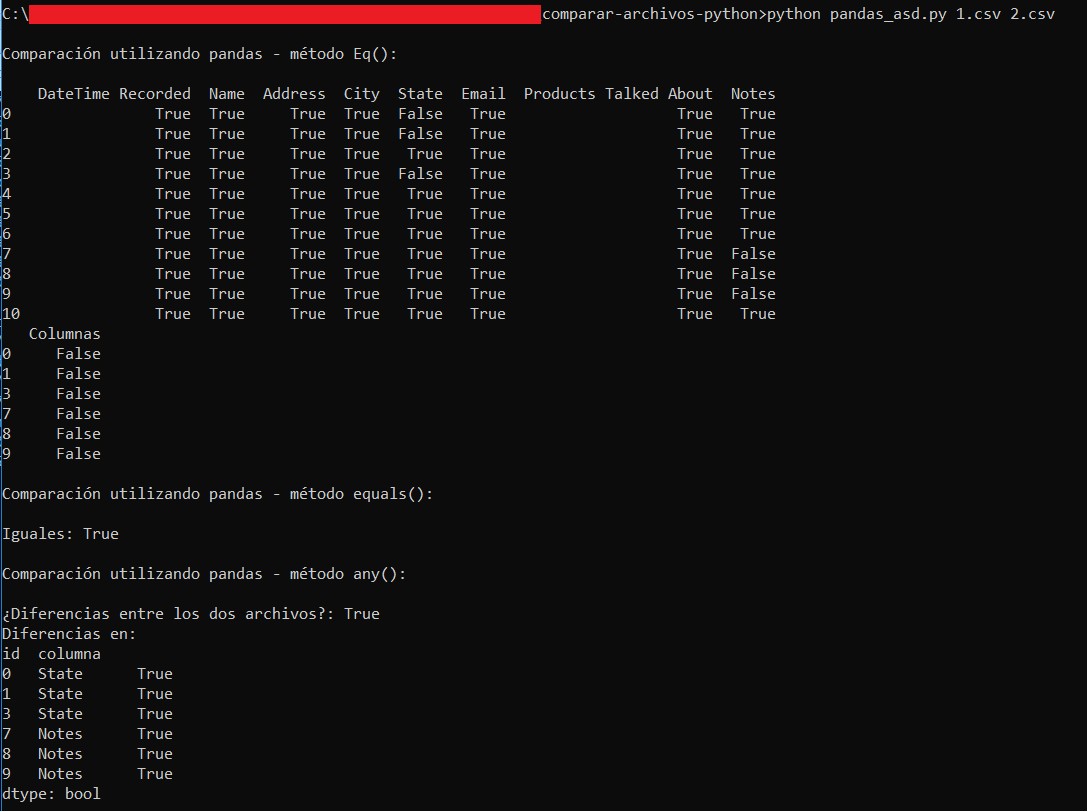

## Comparando datos utilizando el algoritmo MD5 CHecksum <a class="anchor" id="md5"></a>
El algoritmo MD5 Hash es parte de la librería "hashlib" de python, acepta una secuencia de bytes y devuelve un valor hash de 128 bits. Se suele utilizar para comprobar la integridad de los datos, realizar comprobaciones o control de versiones. La documentación se puede consultar en este [enlace](https://docs.python.org/3/library/hashlib.html). Funciones principales:

- encode (): Convierte el string en bytes para que sea aceptable por la función hash.
- digest (): Devuelve los datos codificados en formato byte.
- hexdigest (): devuelve los datos codificados en formato hexadecimal.


NOTA IMPORTANTE: es libreria sólo funciona con strings, bytes ó os.PathLike object (argumentos pasados por la shell del sistema), luego no acepta dataframes o series por jupyter notebook. Sin embargo, si es capaz de comparar datashets si los pasamos por shell, siendo md5.py el script en python del código que se presenta más abajo y se puede encontrar en el repositorio:
> $ python md5.py archivo1 archivo2

> $ python md5(v2).py archivo1 archivo2

La versión v2 incluye un main(), pero el código es el mismo.

El siguiente código muestra el funcionamiento del MD5 hash que acepta bytes y devuelve la salida como bytes.

In [33]:
# ejemplo MD5 (byte - byte) 
  
import hashlib 
  
# Sin codificar para caracteres utf8, solo acepta caracteres ASCII
output = hashlib.md5(b'Nobody expects the spanish inquisition') 
  
# devuelve la salida como bytes
print("Equivalencia byte hash: ", end ="") 
print(output.digest()) 

Equivalencia byte hash: b"\x86|'\x8c\xfc\xe1Q\xf1\xa5\xe4\xebn\x1f\xe6\x11\xe5"


El siguiente código muestra el funcionamiento del MD5 hash que acepta un string y devuelve la salida hexadecimal equicalente:

In [36]:
# ejemplo md5 (string - hexadecimal) 
  
import hashlib 
  
# initializing string 
str = "Nobody expects the spanish inquisition"
  
# primero codificamos el string usando encode() y luego se envia a md5()
result = hashlib.md5(str.encode()) 
  
# devuelve la salida hexadecimal equivalente
print("Equivalencia hexadecimal hash: : ", end ="") 
print(result.hexdigest()) 

Equivalencia hexadecimal hash: : 867c278cfce151f1a5e4eb6e1fe611e5


Habitualmente se utiliza este hash hexadecimal para comparar datos, revisando si ha habido cambios. Un ejemplo de esto se puede ver a continuación, utilizando la obra "Sueño de una noche de verano" de Shakespeare, extraida de gutenberg.org. 

Realizamos una copia en local y comparamos con el archivo original (utilizando la librería request)

In [77]:
import hashlib
import requests
night = requests.get("http://www.gutenberg.org/ebooks/1514.txt.utf-8")
len(night.text)
print("Longitud del texto:",len(night.text))
print("------------")
# fragmento del texto
print(night.text[2000:3000])
print("------------")
hashx = hashlib.md5(night.text.encode("utf-8")).hexdigest()
print("Hash hexadecimal:", hashx)

Longitud del texto: 112127
------------
te first edition [xxxxx10x.xxx] please check file sizes
in the first week of the next month.  Since our ftp program has
a bug in it that scrambles the date [tried to fix and failed] a
look at the file size will have to do, but we will try to see a
new copy has at least one byte more or less.


Information about Project Gutenberg (one page)

We produce about two million dollars for each hour we work.  The
time it takes us, a rather conservative estimate, is fifty hours
to get any etext selected, entered, proofread, edited, copyright
searched and analyzed, the copyright letters written, etc.  This
projected audience is one hundred million readers.  If our value
per text is nominally estimated at one dollar then we produce $2
million dollars per hour this year as we release thirty-six text
files per month, or 432 more Etexts in 1999 for a total of 2000+
If these reach just 10% of the computerized population, then the
total should reach over 200 bill

¿Es igual el hash de nuestra copia en local que el del original alojado en la web?

In [78]:
hash2 = hashlib.md5(requests.get("http://www.gutenberg.org/ebooks/1514.txt.utf-8").text.encode("utf-8")).hexdigest()
hashx == hash2


True

Ahora vamos a realizar una modifican en el texto, reemplazando "Dream" por "sueño". Así es como quedaría la primera linea.

In [83]:
print(night.text[0:100])
print("-----------------")
print(night.text.replace("Dream", "sueño")[0:100])

﻿
Project Gutenberg Etext of A Midsummer Night's Dream by Shakespeare
PG has multiple editions of 
-----------------
﻿
Project Gutenberg Etext of A Midsummer Night's sueño by Shakespeare
PG has multiple editions of 


Realizamos la sustitución, obtenemos el nuevo hash y comparamos con el original, como se puede observar, ya no son iguales.

In [84]:
hashx = hashlib.md5(night.text.replace("Dream", "sueño").encode("utf-8")).hexdigest()
print(hashx)
hashx == hash2

cfec43c079e51cecfea55ef71c412e33


False

#### Comparando datos  con md5 - Ejecutable python <a class="anchor" id="python_md5"></a>
A continuación se incluye el código del script md5.py que comparar dos archivos sí lo llamamos por shell, ya que como se ha indicado anteriormente, esta librería sólo funciona con strings, bytes ó os.PathLike object (argumentos pasados por la shell del sistema), luego no acepta dataframes o series por jupyter notebook. Sin embargo, si es capaz de comparar datashets si los pasamos por shell, siendo md5.py el script en python del código que se presenta más abajo y se puede encontrar en el repositorio:
> $ python md5(v2).py archivo1 archivo2

In [ ]:
# script de md5(v2).py
# Comparar si dos archivos son iguales mediante MD5 Checksum (V2 con main)

# librerias
#import hashlib
import hashlib, sys

# paso de ficheros por argumento de shell
files = [sys.argv[1], sys.argv[2]] 
def md5(fname):
    md5hash = hashlib.md5()
    
    # Abriremos el fichero linea a linea, por cuestiones de memoria.
    with open(fname) as handle:
        for line in handle:
            md5hash.update(line.encode('utf-8'))
    return(md5hash.hexdigest())

def main():
    print('Comparando archivos',files[0],' y ',files[1], " usando MD5.")

    if md5(files[0]) == md5(files[1]):
        print('Coinciden.')
    else:
        print('No coinciden.')


if __name__ == "__main__":
    main()

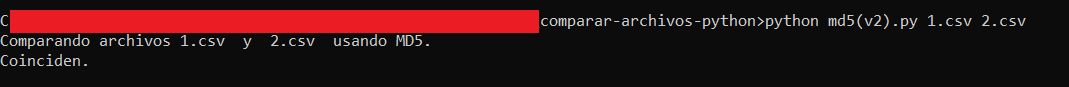

## Comparando datos utilizando el algoritmo SHA1 <a class="anchor" id="sha1"></a>
El algoritmo SHA1 es otro algoritmo hexadecimal que convertirá el contenido de nuestro archivo en un string. Es el mismo algoritmo que Bitcoin usa para su proceso de minería blockchain. Es parte de la librería hashlib, y se utiliza exactamente igual que  md5. Este es el contenido del script sha1.py el script que se puede encontrar en el repositorio:
> $ python sha1.py archivo1 archivo2

In [ ]:
# Comparar si dos archivos son iguales mediante SHA1

# librerias
#import hashlib
import hashlib, sys

# paso de ficheros por argumento de shell
files = [sys.argv[1], sys.argv[2]] 
def sha1(fname):
    sha1hash = hashlib.sha1()
    
    # Abriremos el fichero linea a linea, por cuestiones de memoria.
    with open(fname) as handle:
        for line in handle:
            sha1hash.update(line.encode('utf-8'))
    return(sha1hash.hexdigest())

def main():
    print('Comparando archivos',files[0],' y ',files[1], " usando SHA1.")

    if sha1(files[0]) == sha1(files[1]):
        print('Coinciden.')
    else:
        print('No coinciden.')


if __name__ == "__main__":
    main()

#### Comparando datos con SHA1 - Ejecutable python <a class="anchor" id="python_sha1"></a>

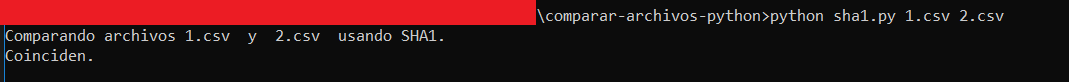

<p style="display: none;">
	autor: Guillermo Benito Barrios
    github: https://github.com/GuillermoBenitoBarrios 
</p>